<a href="https://colab.research.google.com/github/denden26/My-Python-Project/blob/main/Product_Recommendation_System_for_E_Commerce_Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sistem Rekomendasi Produk untuk bisnis e-commerce**

Sistem rekomendasi yang dikembangkan dengan baik akan membantu bisnis meningkatkan pengalaman pembelanja mereka di situs web dan menghasilkan akuisisi dan retensi pelanggan yang lebih baik.

Sistem rekomendasi yang saya rancang di bawah ini didasarkan pada perjalanan pelanggan baru dari saat dia pertama kali membuka situs web bisnis hingga melakukan pembelian berulang.

Sistem rekomendasi dirancang dalam 3 bagian berdasarkan konteks bisnis:

- Sistem rekomendasi bagian 1: Sistem berbasis produk populer yang ditargetkan untuk pelanggan/pengguna baru

- Sistem rekomendasi bagian 2: Sistem penyaringan kolaboratif berbasis model berdasarkan riwayat pembelian pelanggan dan peringkat yang diberikan oleh pengguna lain yang membeli barang barang serupa

- Sistem rekomendasi bagian III: Saat bisnis menyiapkan situs web e-commerce untuk pertama kalinya tanpa peringkat produk apa pun

Ketika pelanggan baru tanpa riwayat pembelian sebelumnya mengunjungi situs web e-commerce untuk pertama kalinya, dia direkomendasikan produk paling populer yang dijual di situs web. Setelah dia melakukan pembelian, sistem rekomendasi memperbarui dan merekomendasikan produk lain berdasarkan riwayat pembelian dan peringkat yang diberikan oleh pengguna lain di situs web. Bagian terakhir dilakukan dengan menggunakan teknik penyaringan kolaboratif.

**Sistem Rekomendasi - Bagian 1**

Sistem rekomendasi berdasarkan popularitas produk yang ditargetkan untuk pelanggan/pengguna baru
- Berbasis popularitas adalah strategi hebat untuk menargetkan pelanggan baru dengan produk paling populer yang dijual di situs web bisnis dan sangat berguna untuk memulai rekomendasi sistem.
- Dataset : https://www.kaggle.com/datasets/skillsmuggler/amazon-ratings

**Import library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#%matplotlib inline
plt.style.use("ggplot")

import sklearn 
from sklearn.decomposition import TruncatedSVD

**Loading dataset**

In [ ]:
amazon_ratings = pd.read_csv('/content/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [ ]:
amazon_ratings.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
amazon_ratings.shape

(2023070, 4)

**Mencari produk populer**

In [ ]:
populer_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_populer_products = populer_products.sort_values('Rating', ascending=False)
most_populer_products.head()

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088


**Membuat grafik most populer product**

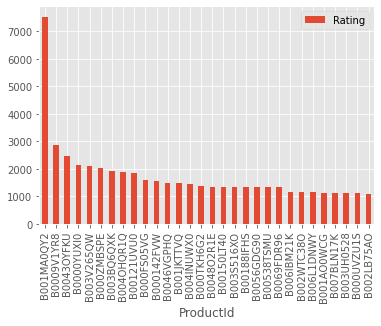

In [ ]:
most_populer_products.head(30).plot(kind='bar')

**Analisis**

- Grafik diatas merupakan urutan terbesar ke terkecil dari produk paling populer berdasarkan ratings 
- Produk rekomendasi yang dapat digunakan misalnya product dengan ID #B001MA0QY2 dengan rating 7533 maka product populer selanjutnya yaitu product dengan ID #B0009V1YRB dengan ratings 2869, dan seterusnya

**Sistem Rekomendasi - Bagian 2**

**Model-based collaborative filtering system**

- Merekomendasikan item kepada pengguna berdasarkan riwayat pembelian dan kesamaan peringkat yang diberikan oleh pengguna lain yang membeli item dengan pelanggan tertentu.
- Teknik penyaringan kolaboratif berbasis model ditutup di sini karena membantu dalam membuat produk prediksi untuk pengguna tertentu dengan mengidentifikasi pola berdasarkan preferensi dari beberapa data pengguna.

**Utility Matrix based on products sold and user reviews**

Utility Matrix : Matriks utilitas terdiri dari semua kemungkinan detail preferensi item pengguna (peringkat) yang direpresentasikan sebagai matriks. Matriks utilitas jarang karena tidak ada pengguna yang akan membeli semua item dalam daftar, oleh karena itu, sebagian besar nilainya tidak diketahui.

In [ ]:
#subset of Amazon rating

amazon_ratings1 = amazon_ratings.head(10000)

In [ ]:
rating_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
rating_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Seperti yang diharapkan, matriks utilitas yang diperoleh di atas adalah sparce, saya telah mengisi nilai yang tidak diketahui dengan nilai 0.

In [ ]:
rating_utility_matrix.shape

(9697, 886)

**Transposing pada matriks**

Menjadikan kolom userid menjadi baris dan productid menjadi kolom

In [ ]:
X = rating_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(886, 9697)

**Produk unik dalam subset data**

In [ ]:
X1 = X

**Decomposing matriks**

In [ ]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

**Correlation matrix**

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

**Isolating Product ID #6117036094 dari correlation matrix**

Asumsi customer membeli produk ID #6117036094 (random)

In [ ]:
X.index[99]

'6117036094'

index product ID #6117036094 yang dibeli oleh customer

In [ ]:
i ='6117036094'

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Korelasi untuk semua item dengan item yang dibeli oleh customer ini berdasarkan item yang dinilai oleh customer lain orang yang membeli produk yang sama

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

**Merekomendasikan 10 produk teratas yang berkorelasi tinggi secara berurutan**

Produk yang direkomendasi adalah product yang memiliki tingkat korelasi lebih dari 90%

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.90])

#Remove the item already bought by customer
Recommend.remove(i)
Recommend[0:9]

['0558925278',
 '0733001998',
 '1304482634',
 '1451646526',
 '1879187396',
 '322700075X',
 '4057362843',
 '535795545X',
 '5357955751']

Product Id #6117036094 diatas adalah 10 produk teratas yang akan ditampilkan oleh sistem rekomendasi kepada pelanggan di atas berdasarkan riwayat pembelian pelanggan lain di situs e-commerce.

**Sistem Rekomendasi - Bagian 3**

- Untuk bisnis tanpa riwayat pembelian item pengguna, sistem rekomendasi berbasis mesin pencari dapat dirancang untuk pengguna. Rekomendasi produk dapat didasarkan pada analisis pengelompokan tekstual yang diberikan dalam deskripsi produk.
Dataset : https://www.kaggle.com/competitions/home-depot-product-search-relevance/data?select=product_descriptions.csv.zip

In [ ]:
#import library

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

**Sistem rekomendasi berdasarkan item ke item berdasarkan deskripsi produk**

Berlaku ketika bisnis membuat situs web E-commerce baru untuk pertama kalinya

In [ ]:
product_description = pd.read_csv('/content/product_descriptions.csv')
product_description.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [ ]:
product_description.shape

(124428, 2)

**Checking of missing value**

In [ ]:
product_description = product_description.dropna()
product_description.shape
product_description.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [ ]:
product_description1 = product_description.head(500)
#product_description1.iloc[:,1]

product_description1['product_description'].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

**Ekstraksi fitur dari deskripsi produk**

Mengubah teks dalam deskripsi produk menjadi data numerik untuk di analisis

In [ ]:
vectorize = TfidfVectorizer(stop_words='english')
X1 = vectorize.fit_transform(product_description1['product_description'])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

**Visualizing product clusters in subset of data**

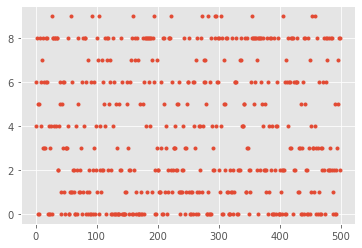

In [ ]:
# fitting K-Means to the dataset
X = X1

kmeans = KMeans(n_clusters =10, init='k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, '.')
plt.show()

In [ ]:
def print_cluster(i):
  print('Cluster %d:' % i),
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind]),
  print

Output

- Rekomendasi produk berdasarkan produk saat ini yang dicari dan dipilih oleh pengguna.
- Untuk merekomendasikan produk terkait berdasarkan yang sering dibeli bersama.

**Top words di setiap cluster berdasarkan deskripsi produk**

In [ ]:
# Optimal cluster is

true_k = 10

model = KMeans(n_clusters =true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print('Top terms per clusters :')
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorize.get_feature_names()
for i in range(true_k):
  print_cluster(i)

Top terms per clusters :
Cluster 0:
 water
 insulation
 concrete
 metal
 ft
 seal
 use
 stake
 coating
 used
Cluster 1:
 light
 frame
 outdoor
 watt
 collection
 patio
 dining
 bay
 hampton
 cushions
Cluster 2:
 paint
 roller
 ft
 tape
 water
 easy
 wood
 cover
 smooth
 azek
Cluster 3:
 door
 nickel
 shelves
 cabinet
 adjustable
 wall
 easy
 wood
 style
 home
Cluster 4:
 sheet
 metal
 proposition
 nbsp
 residents
 california
 65
 repair
 cut
 used
Cluster 5:
 landscape
 natural
 wall
 outdoor
 ft
 edging
 beds
 easy
 post
 pavers
Cluster 6:
 air
 window
 control
 cooling
 cooking
 water
 cycle
 oven
 power
 ft
Cluster 7:
 piece
 toilet
 design
 storage
 installation
 easy
 flush
 water
 finish
 bowl
Cluster 8:
 tool
 saw
 easy
 cutting
 mounting
 lightweight
 brackets
 capacity
 aluminum
 included
Cluster 9:
 volt
 20
 power
 light
 watt
 battery
 cutting
 blade
 tool
 amp


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Predicting clusters based on key search words**

In [ ]:
def show_recommendations(product):
  #print('Cluster ID:')
  Y = vectorize.transform([product])
  prediction = model.predict(Y)
  #print(prediction)
  print_cluster(prediction[0])

**Contoh Keyword : cutting tool**

In [ ]:
show_recommendations('cutting tool')

Cluster 8:
 tool
 saw
 easy
 cutting
 mounting
 lightweight
 brackets
 capacity
 aluminum
 included


**Contoh Keyword : spray paint**

In [ ]:
show_recommendations('spray paint')

Cluster 2:
 paint
 roller
 ft
 tape
 water
 easy
 wood
 cover
 smooth
 azek


**Contoh Keyword : steel drill**

In [ ]:
show_recommendations('steel drill')

Cluster 9:
 volt
 20
 power
 light
 watt
 battery
 cutting
 blade
 tool
 amp


**Contoh Keyword : water**

In [ ]:
show_recommendations('water')

Cluster 0:
 water
 insulation
 concrete
 metal
 ft
 seal
 use
 stake
 coating
 used


Setelah sebuah cluster diidentifikasi berdasarkan kata-kata pencarian pengguna, sistem rekomendasi dapat menampilkan item dari cluster produk yang sesuai berdasarkan deskripsi produk.

Kesimpulan

Pemodelan Machine Learning ini sangat cocok digunakan untuk situs e-commerce baru dan tidak memiliki riwayat pembelian/pemeringkatan item dari penggunanya. Sistem rekomendasi ini akan membantu pengguna mendapatkan rekomendasi yang baik untuk mendapatkan produk yang sesuai dan setelah pembeli memiliki riwayat pembelian, mesin rekomendasi dapat menggunakan teknik penyaringan kolaboratif berbasis model seperti pada part 2.